In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Simple 2 tap fading

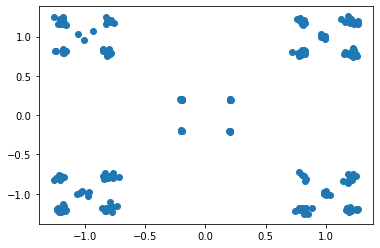

In [2]:
nsamples = 200
samp_rate = 32e3

# QPSK modulation
samp_per_sym = 4
symbol_map = {
    0: 1 + 1j,
    1: -1 + 1j,
    2: -1 - 1j,
    3: 1 - 1j,
}

# generate random data for testing
data = np.random.randint(low=0, high=4, size=nsamples)

# modulate and add AWGN
noise = np.random.normal(0, .03, size=nsamples) + 1j * np.random.normal(0, .03, size=nsamples)
sig = np.array(list(map(lambda v: symbol_map[v], data))) + noise

# add 2 tap frequency selective channel
delay = np.zeros(5 * samp_per_sym)
one = np.array([1])
taps = np.concatenate([one, delay, .2 * one])

# apply channel
sig_fading = np.convolve(sig, taps)

# plot figure
fig = plt.figure()
plt.scatter(sig_fading.real, sig_fading.imag)